In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
import cleanup
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'joblib'

# GLCM

In [41]:
images = []
labels = []

In [3]:
input0 = 'C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/'
temp = ['Supermarket', 'ShoppingMall','LivingRoom','Kitchen']
for i in temp:
    count = 0
    for filename in os.listdir(input0 + i):
        img = cv2.imread(input0 + i + '/' + filename, 0)
        images.append(img)
        labels.append(temp.index(i))
        count += 1
        if count == 500:
                break
    print(i + ' : ' + str(count))

Supermarket : 200
ShoppingMall : 200
LivingRoom : 200
Kitchen : 200


In [4]:
images = np.array(images)
labels = np.array(labels)

In [5]:
# train test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=5)

In [6]:
# Encoding labels for the final model

le = preprocessing.LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)

joblib.dump(le ,'C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/encoder_model')

['C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/encoder_model']

In [7]:
# Encoding for training model

le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [8]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [9]:
def GLCM_feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
       # print(image)
        #break
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image,:,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
        #Full image
        #GLCM = graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr

        GLCM2 = greycomatrix(img, [2], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2
       
        GLCM3 = greycomatrix(img, [3], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        GLCM6= greycomatrix(img, [5], [0])       
        GLCM_Energy6 = greycoprops(GLCM6, 'energy')[0]
        df['Energy6'] = GLCM_Energy6
        GLCM_corr6 = greycoprops(GLCM6, 'correlation')[0]
        df['Corr6'] = GLCM_corr6       
        GLCM_diss6= greycoprops(GLCM6, 'dissimilarity')[0]
        df['Diss_sim6'] = GLCM_diss6       
        GLCM_hom6 = greycoprops(GLCM6, 'homogeneity')[0]
        df['Homogen6'] = GLCM_hom6       
        GLCM_contr6 = greycoprops(GLCM6, 'contrast')[0]
        df['Contrast6'] = GLCM_contr6
        
        GLCM7 = greycomatrix(img, [0], [3*np.pi/4])       
        GLCM_Energy7 = greycoprops(GLCM7, 'energy')[0]
        df['Energy7'] = GLCM_Energy7
        GLCM_corr7 = greycoprops(GLCM7, 'correlation')[0]
        df['Corr7'] = GLCM_corr7       
        GLCM_diss7 = greycoprops(GLCM7, 'dissimilarity')[0]
        df['Diss_sim7'] = GLCM_diss7      
        GLCM_hom7 = greycoprops(GLCM7, 'homogeneity')[0]
        df['Homogen7'] = GLCM_hom7       
        GLCM_contr7 = greycoprops(GLCM7, 'contrast')[0]
        df['Contrast7'] = GLCM_contr7
        
        GLCM8 = greycomatrix(img, [3], [np.pi/2])       
        GLCM_Energy8 = greycoprops(GLCM8, 'energy')[0]
        df['Energy8'] = GLCM_Energy8
        GLCM_corr8 = greycoprops(GLCM8, 'correlation')[0]
        df['Corr8'] = GLCM_corr8       
        GLCM_diss8 = greycoprops(GLCM8, 'dissimilarity')[0]
        df['Diss_sim8'] = GLCM_diss8      
        GLCM_hom8 = greycoprops(GLCM8, 'homogeneity')[0]
        df['Homogen8'] = GLCM_hom8       
        GLCM_contr8 = greycoprops(GLCM8, 'contrast')[0]
        df['Contrast8'] = GLCM_contr8
    
        #Add more filters as needed
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy

        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [10]:
image_features = GLCM_feature_extractor(x_train)
X_for_ML =image_features

In [11]:
image_features

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Corr7,Diss_sim7,Homogen7,Contrast7,Energy8,Corr8,Diss_sim8,Homogen8,Contrast8,Entropy
0,0.014790,0.945454,11.633981,0.162010,329.775960,0.012925,0.882334,17.553013,0.111101,711.869482,...,1.0,0.0,1.0,0.0,0.011427,0.776841,26.152813,0.062618,1338.145313,7.653610
0,0.036433,0.916038,10.394624,0.216459,353.299889,0.031080,0.805666,16.182106,0.169718,820.543837,...,1.0,0.0,1.0,0.0,0.029964,0.643698,22.470688,0.139254,1505.097188,6.989809
0,0.013246,0.808083,22.505659,0.113286,1716.990773,0.012483,0.705533,30.081535,0.092720,2638.178757,...,1.0,0.0,1.0,0.0,0.009823,0.098438,68.464312,0.030381,8170.352063,7.808356
0,0.013268,0.880440,15.616080,0.108180,597.891548,0.011740,0.752560,23.226066,0.073287,1239.214162,...,1.0,0.0,1.0,0.0,0.010730,0.559617,33.831312,0.049119,2207.823562,7.622934
0,0.012676,0.869717,18.181348,0.090927,747.858883,0.011571,0.746872,25.377294,0.068761,1455.931238,...,1.0,0.0,1.0,0.0,0.010527,0.377913,41.156437,0.043688,3572.263063,7.686395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.016874,0.872937,17.862943,0.160310,921.988435,0.014944,0.742448,26.859995,0.120557,1868.834201,...,1.0,0.0,1.0,0.0,0.012731,0.437684,43.167250,0.071431,4091.603250,7.699348
0,0.024536,0.912653,12.018393,0.223973,583.552350,0.020981,0.804791,18.911334,0.168006,1303.644469,...,1.0,0.0,1.0,0.0,0.019766,0.809020,19.322750,0.139403,1298.011125,7.557373
0,0.016579,0.910497,12.553826,0.160273,440.760888,0.014621,0.810144,19.132626,0.108938,935.791729,...,1.0,0.0,1.0,0.0,0.013508,0.710224,24.630000,0.110433,1418.466250,7.535972
0,0.018418,0.934246,10.620079,0.193231,341.372785,0.015726,0.866817,15.729725,0.131892,691.737413,...,1.0,0.0,1.0,0.0,0.014111,0.829184,18.701125,0.100422,892.433125,7.540917


In [12]:
import lightgbm as lgb
d_train = lgb.Dataset(X_for_ML, label=y_train) 

In [13]:
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':25,  # earlier was 100 - decrease number of leaves 
              'max_depth':-1,   # earlier was 15 -  decrease max depth for better 
              'num_class':4,  #no.of unique values in the target class not inclusive of the end value
              'force_col_wise': 'true'}
              #'verbosity': -1}
# %%
lgb_model = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates

joblib.dump(lgb_model,"C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/model_lgbm_B")


[LightGBM] [Info] Total Bins 6207
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 29
[LightGBM] [Info] Start training from score -1.337504
[LightGBM] [Info] Start training from score -1.444188
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.380064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

['C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/model_lgbm_B']

In [14]:
test_features = GLCM_feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

In [15]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))
print("Precision Score: ",metrics.precision_score(test_labels, test_prediction,average='macro'))
print("Recall Score: ",metrics.recall_score(test_labels, test_prediction,average='weighted'))
print("F1 Score: ",metrics.f1_score(test_labels, test_prediction,average='micro'))

print("Confusion Matrix: ")
print(confusion_matrix(y_test, test_prediction,))

# pr, tpr, _ = metrics.roc_curve(y_test,  test_prediction)
# auc = metrics.roc_auc_score(y_test, test_prediction)
# #plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()



Accuracy =  0.51875
Precision Score:  0.526114256678281
Recall Score:  0.51875
F1 Score:  0.51875
Confusion Matrix: 
[[21  8  1  2]
 [19 20  4  6]
 [ 4  3 21 12]
 [ 4  4 10 21]]


# Decision Tree Classifier : 'Supermarket', 'ShoppingMall','LivingRoom','Kitchen'

In [16]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
model_dt.fit(X_for_ML, y_train)

joblib.dump(model_dt,"C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/model_dt_C")

#predicting the traget variable using testing variables
test_prediction = model_dt.predict(test_for_RF)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, test_prediction)*100,"%")
# print("Train Accuracy:",model_dt.score(x_train, y_train))
# print("Test Accuracy:",model_dt.score(x_test, y_test))
# print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
# print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
# print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
# print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
# print("Confusion Matrix: ")
# rint(confusion_matrix(y_test, y_pred1))
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))
print("Precision Score: ",metrics.precision_score(test_labels, test_prediction,average='macro'))
print("Recall Score: ",metrics.recall_score(test_labels, test_prediction,average='weighted'))
print("F1 Score: ",metrics.f1_score(test_labels, test_prediction,average='micro'))

# %%
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)



print("Confusion Matrix: ")
print(confusion_matrix(y_test, test_prediction,))

# fpr, tpr, _ = metrics.roc_curve(y_test,  test_prediction)
# auc = metrics.roc_auc_score(y_test, test_prediction)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()





Decision Tree Results
Decision Tree Accuracy:  45.625 %
Accuracy =  0.45625
Precision Score:  0.4588236966285747
Recall Score:  0.45625
F1 Score:  0.45625
Confusion Matrix: 
[[18 10  1  3]
 [18 18  8  5]
 [ 3  8 19 10]
 [ 5  5 11 18]]


# Random Forest classifier

In [17]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 50)
x_train = X_for_ML
x_test = test_for_RF

model_rf.fit(X_for_ML, y_train)
joblib.dump(model_rf,"C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/model_rf_B")

y_pred2 = model_rf.predict(test_for_RF)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, train_labels))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='po  sitive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
#print("ROC curve ",metrics.plot_roc_curve(model_rf,x_test, y_test))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.50625
Precision Score:  0.50625
Recall Score:  0.50625
F1 Score:  0.50625
Confusion Matrix: 
[[21  4  4  3]
 [17 21  7  4]
 [ 4  2 17 17]
 [ 3  3 11 22]]


In [18]:
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
import warnings

def glcmProc(dataset):
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
       # print(image)
        #break
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image,:,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
        #GLCM = graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [2], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2
       
        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        


        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        GLCM6= greycomatrix(img, [5], [0])       
        GLCM_Energy6 = greycoprops(GLCM6, 'energy')[0]
        df['Energy6'] = GLCM_Energy6
        GLCM_corr6 = greycoprops(GLCM6, 'correlation')[0]
        df['Corr6'] = GLCM_corr6       
        GLCM_diss6= greycoprops(GLCM6, 'dissimilarity')[0]
        df['Diss_sim6'] = GLCM_diss6       
        GLCM_hom6 = greycoprops(GLCM6, 'homogeneity')[0]
        df['Homogen6'] = GLCM_hom6       
        GLCM_contr6 = greycoprops(GLCM6, 'contrast')[0]
        df['Contrast6'] = GLCM_contr6
        
        GLCM7 = greycomatrix(img, [0], [3*np.pi/4])       
        GLCM_Energy7 = greycoprops(GLCM7, 'energy')[0]
        df['Energy7'] = GLCM_Energy7
        GLCM_corr7 = greycoprops(GLCM7, 'correlation')[0]
        df['Corr7'] = GLCM_corr7       
        GLCM_diss7 = greycoprops(GLCM7, 'dissimilarity')[0]
        df['Diss_sim7'] = GLCM_diss7      
        GLCM_hom7 = greycoprops(GLCM7, 'homogeneity')[0]
        df['Homogen7'] = GLCM_hom7       
        GLCM_contr7 = greycoprops(GLCM7, 'contrast')[0]
        df['Contrast7'] = GLCM_contr7
        
        GLCM8 = greycomatrix(img, [3], [np.pi/2])       
        GLCM_Energy8 = greycoprops(GLCM8, 'energy')[0]
        df['Energy8'] = GLCM_Energy8
        GLCM_corr8 = greycoprops(GLCM8, 'correlation')[0]
        df['Corr8'] = GLCM_corr8       
        GLCM_diss8 = greycoprops(GLCM8, 'dissimilarity')[0]
        df['Diss_sim8'] = GLCM_diss8      
        GLCM_hom8 = greycoprops(GLCM8, 'homogeneity')[0]
        df['Homogen8'] = GLCM_hom8       
        GLCM_contr8 = greycoprops(GLCM8, 'contrast')[0]
        df['Contrast8'] = GLCM_contr8
    
        #Add more filters as needed
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy
     
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
            
    return image_dataset

In [46]:
def predLGBM(model, img_path):
    dataset = np.array([cv2.resize(cv2.imread(img_path, 0), (128, 128))])
    test_features = glcmProc(dataset)

    test_features = np.expand_dims(test_features, axis=0)
    test_for_RF = np.reshape(test_features, (dataset.shape[0], -1))
    test_prediction = model.predict(test_for_RF)
    test_prediction=np.argmax(test_prediction, axis=1)
    #Inverse le transform to get original label back. 
    le = joblib.load("C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/encoder_model")
    test_prediction = le.inverse_transform(test_prediction)

    return test_prediction, model.predict(test_for_RF)

# Final Classification result

hello
Grocery Store


<function matplotlib.pyplot.show(close=None, block=None)>

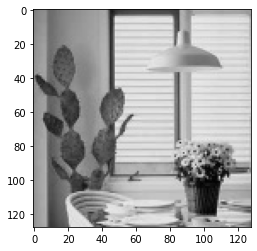

In [57]:
import joblib
import pickle
import cv2
import pandas as pd
import numpy as np
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
img_path ="C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/Kitchen/40.jpg"
#img = cv2.imread(r'C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/Kitchen/27.jpg')


score = []

from tkinter import Tk     # from tkinter import Tk for Python 3.x
from tkinter.filedialog import askopenfilename

modelB = joblib.load("C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/model_lgbm_B")

modelB_pred, modelB_proba = predLGBM(modelB, img_path)

if modelB_proba[0][0] > modelB_proba[0][1]:
    print("Grocery Store")
else:
    print("hello")
print("Grocery Store" if modelB_pred else "Mall")

    
img_path = cv2.imread("C:/Users/hp/Documents/TY-sem 2/CV/Labs/lab10/Kitchen/40.jpg")
plt.imshow (img_path)
plt.show


In [58]:
modelB_proba 

array([[0.09890284, 0.10043141, 0.34580645, 0.45485931]])